In [1]:
# my notebook

In [29]:
import numpy as np
from bs4 import BeautifulSoup
import requests
import pandas as pd
from requests import get
from prepare import prep_gitMDs
import nltk
from wordcloud import WordCloud

from prepare import basic_body_clean
from prepare import tokenize
from prepare import remove_stopwords
from prepare import lemmatize
from prepare import basic_code_clean

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# setting up environment
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

from requests import get
from bs4 import BeautifulSoup
import os

# ACQUIRE

In [94]:
url = ['https://github.com/pewresearch/pewanalytics', 'https://github.com/texastribune/scuole', 'https://github.com/texastribune/thermometer', 'https://github.com/texastribune/walls', 'https://github.com/texastribune/geoip2', 'https://github.com/texastribune/queso-tools', 'https://github.com/texastribune/django-locking', 'https://github.com/texastribune/data-visuals-create', 'https://github.com/texastribune/tacobots', 'https://github.com/newscorp-ghfb/validates_timeliness','https://github.com/newscorp-ghfb/rbenv-cookbook','https://github.com/newscorp-ghfb/geogle']

url2 = ['https://github.com/pewresearch/pewtils', 'https://github.com/pewresearch/search_sampler', 'https://github.com/gawkermedia/kinja-post-gem', 'https://github.com/bloomberg/chef-bcpc', 'https://github.com/bloomberg/locking_resource-cookbook', 'https://github.com/bloomberg/collectd-cookbook', 'https://github.com/bloomberg/nginx-cookbook', 'https://github.com/bloomberg/consul-cluster-cookbook', 'https://github.com/bloomberg/cobbler-cookbook', 'https://github.com/bloomberg/openbfdd-cookbook', 'https://github.com/newscorp-ghfb/kaminari']

url3 = ['https://github.com/bloomberg/chef-bcs', 'https://github.com/bloomberg/zookeeper-cookbook', 'https://github.com/bloomberg/confd-cookbook', 'https://github.com/bloomberg/collectd_plugins-cookbook', 'https://github.com/bloomberg/kubernetes-cluster-cookbook', 'https://github.com/techcrunch/ey-cloud-recipes', 'https://github.com/techcrunch/json_printer', 'https://github.com/observermedia/realgraph-listener', 'https://github.com/observermedia/django-wordpress-rest', 'https://github.com/thenextweb/passgenerator']

url4 = ['https://github.com/thenextweb/amp-wp', 'https://github.com/thenextweb/laravel-elasticsearch', 'https://github.com/thenextweb/slack-laravel', 'https://github.com/thenextweb/craft-3-adminbar', 'https://github.com/thenextweb/Embed', 'https://github.com/thenextweb/oembed', 'https://github.com/thenextweb/flatten', 'https://github.com/texastribune/top10pct', 'https://github.com/texastribune/newsapps-app-kit']

url5 = ['https://github.com/thenextweb/cro', 'https://github.com/thenextweb/jQuery-Search', 'https://github.com/texastribune/tx_salaries', 'https://github.com/texastribune/the-dp', 'https://github.com/texastribune/tx_lege_districts', 'https://github.com/texastribune/tt_social_auth', 'https://github.com/texastribune/armstrong.core.tt_sections', 'https://github.com/texastribune/aeis', 'https://github.com/texastribune/ox-scale', 'https://github.com/texastribune/django-gistpage', 'https://github.com/newscorp-ghfb/sidekiq-throttler']

url6 = ['https://github.com/theatlantic/django-nested-admin', 'https://github.com/theatlantic/django-xml', 'https://github.com/theatlantic/django-select2-forms', 'https://github.com/theatlantic/django-admin-locking', 'https://github.com/texastribune/lethal-drug-tracker', 'https://github.com/texastribune/txlege-camera-status', 'https://github.com/texastribune/postcss-amp', 'https://github.com/texastribune/talk', 'https://github.com/texastribune/code-grabber', 'https://github.com/texastribune/react-external-boilerplate']

url7 = ['https://github.com/voxmedia/vc-ikea-minisite', 'https://github.com/voxmedia/viz-app', 'https://github.com/voxmedia/prebid.github.io', 'https://github.com/voxmedia/Transcriber', 'https://github.com/voxmedia/userstamp', 'https://github.com/voxmedia/gliss', 'https://github.com/nbcnews/octopus-vr', 'https://github.com/texastribune/donations-app', 'https://github.com/texastribune/djangocms-text-ckeditor', 'https://github.com/texastribune/newsapps-styleguide-2.0', 'https://github.com/texastribune/500', 'https://github.com/WSJ/pinpoint-editor', 'https://github.com/WSJ/ballot-tally']

url8 = ['https://github.com/texastribune/txlege84', 'https://github.com/texastribune/donation-builder', 'https://github.com/abcnews/scrollyteller', 'https://github.com/abcnews/odyssey-scrollyteller', 'https://github.com/abcnews/data-life', 'https://github.com/abcnews/interactive-ssm-map', 'https://github.com/ajam/chartbuilder-electron', 'https://github.com/WSJ/scroll-watcher', 'https://github.com/WSJ/two-step', 'https://github.com/texastribune/faces-of-death-row', 'https://github.com/texastribune/text-balancer', 'https://github.com/WSJ/squaire']

url9 = ['https://github.com/WSJ/the-meta-tag-checker', 'https://github.com/npr/nprapi-wordpress', 'https://github.com/npr/npr-one-backend-proxy-php', 'https://github.com/npr/pmp-wordpress-plugin', 'https://github.com/npr/pmp-php-sdk', 'https://github.com/npr/pmp-drupal-plugin', 'https://github.com/npr/zaphpa', 'https://github.com/npr/silverstripe-opauth', 'https://github.com/npr/Slim']



In [95]:
urlcount = len(url)+len(url2)+len(url3)+len(url4)+len(url5)+len(url6)+len(url7)+len(url8)+len(url9)

urlcount

97

In [96]:
urls = (url)+(url2)+(url3)+(url4)+(url5)+(url6)+(url7)+(url8)+(url9)

# PREP

In [60]:
gitMDs = pd.read_json('pages.json')

In [66]:
gitMDs['readme'] = gitMDs['body'].apply(basic_body_clean).apply(tokenize).apply(remove_stopwords).apply(lemmatize)
gitMDs['language'] = gitMDs['top_code'].apply(basic_code_clean).apply(tokenize).apply(remove_stopwords)
gitMDs[['language', 'percentage']] = gitMDs['language'].str.split(" ",expand=True)
gitMDs['percentage'] = pd.to_numeric(gitMDs['percentage'])

gitMDs.drop(columns = ['body', 'top_code'], inplace = True)

In [67]:
gitMDs

,readme,language,percentage
0,pewanalytics pewanalytics python package provi...,python,99.5
1,scuole ' italian school public school 3 setup ...,python,72.3
2,thermometer,python,89.2
3,wall query salesforce opportunity information ...,python,98.6
4,geoip2 super simple nodejsbased deployment get...,javascript,93.2
...,...,...,...
95,pmp php sdk php api client public medium platf...,php,99.7
96,installing pmpapi module download module would...,php,100.0
97,zaphpa installing zaphpa composer add zaphpaza...,php,100.0
98,module depends opauth no longer maintained ' r...,php,100.0


In [6]:
from sklearn.model_selection import train_test_split

train_validate, test = train_test_split(gitMDs[['language', 'readme']], 
                                        stratify=gitMDs.language, 
                                        test_size=.2)

train, validate = train_test_split(train_validate, 
                                   stratify=train_validate.language, 
                                   test_size=.25)

In [147]:
train.head()

,language,readme
61,javascript,txlege camera status quick script attempt conf...
43,javascript,price admission price admission series publish...
66,html,ikea minisite vox creative ikea minisite 2020 ...
62,javascript,postcss amp postcss plugin convert cs accordin...
29,ruby,jsonprinter allows convert arbitrarily nested ...


In [8]:
validate.head()

,language,readme
3,python,wall query salesforce opportunity information ...
4,javascript,geoip2 super simple nodejsbased deployment get...
90,javascript,squairejs not map table strong visual cue quic...
92,php,npr story api collection tool publishing npr '...
59,python,django admin locking prevents user overwriting...


# EXPLORE

In [144]:
# function to convert df rows to list of words
def rows_to_lists(text):
    words = re.sub(r'[^\w\s]', '', text).split()
    return words

In [145]:
# separating languages and converting rows to lists (1 list per language)
javascript = rows_to_lists(' '.join(gitMDs[gitMDs.language == 'javascript'].readme))
php = rows_to_lists(' '.join(gitMDs[gitMDs.language == 'php'].readme))
html = rows_to_lists(' '.join(gitMDs[gitMDs.language == 'html'].readme))
ruby = rows_to_lists(' '.join(gitMDs[gitMDs.language == 'ruby'].readme))
python = rows_to_lists(' '.join(gitMDs[gitMDs.language == 'python'].readme))

## create bigrams

In [150]:
# getting value counts of bigrams
# ie. how often did they appear in data
js_bigrams = pd.Series(nltk.ngrams(javascript, 2)).value_counts()

# creating top 10 series of most common spam bigrams
top_10_js_bigrams = js_bigrams.head(10)

# checking top 10
top_10_js_bigrams

(npm, run)               22
(npm, install)           10
(texas, tribune)          8
(run, datafetch)          7
(development, server)     6
(code, base)              6
(react, app)              6
(pinpoint, editor)        6
(google, doc)             5
(run, build)              5
dtype: int64

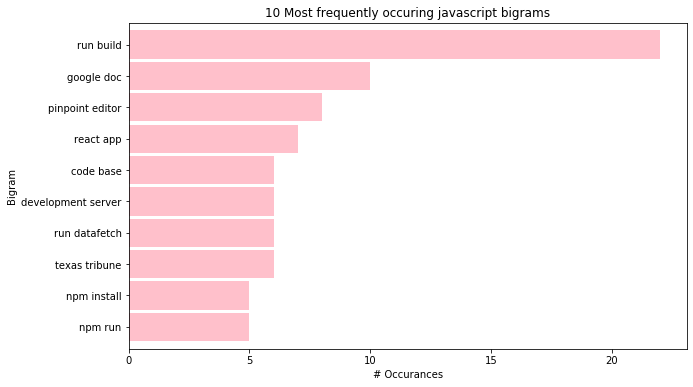

In [156]:
top_10_js_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring javascript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')


ticks, _ = plt.yticks()
labels = top_10_js_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# bigram wordcloud

(-0.5, 799.5, 399.5, -0.5)

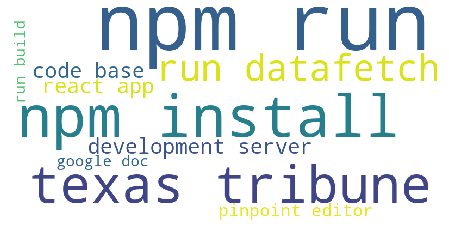

In [151]:
data = {k[0] + ' ' + k[1]: v for k, v in top_10_js_bigrams.to_dict().items()}

img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

# word cloud of single words

In [152]:
# how often did each word appear in data?
js_words = pd.Series(nltk.ngrams(javascript, 1)).value_counts()

# top 10
top_10_js_words = js_words.head(10)

(-0.5, 799.5, 399.5, -0.5)

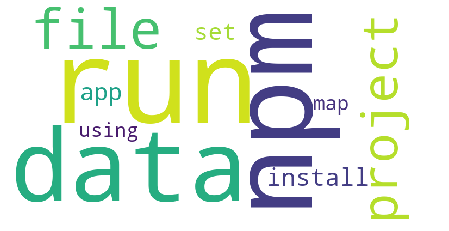

In [153]:
data = {k[0]: v for k, v in top_10_js_words.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

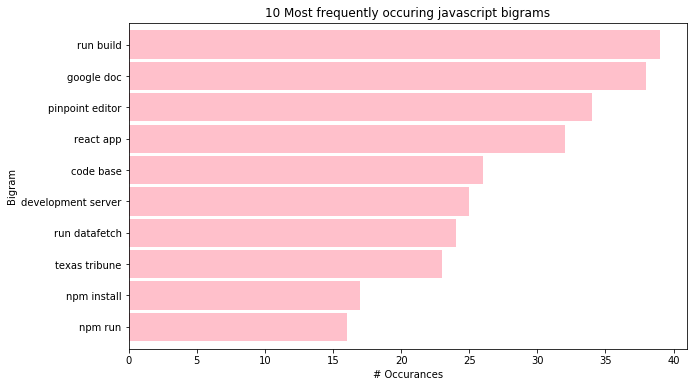

In [157]:
top_10_js_words.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('10 Most frequently occuring javascript bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')


ticks, _ = plt.yticks()
labels = top_10_js_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# MODEL

# bag of words

In [117]:
# creating vectorizer
vectorizer = CountVectorizer(stop_words='english', 
                             min_df=20, 
                             ngram_range=(1,2), 
                             binary=True)

# Learn vocabulary in sentences. 
vectorizer.fit(train.readme)

# Get dictionary. 
vectorizer.get_feature_names()

['add',
 'change',
 'class',
 'code',
 'configuration',
 'content',
 'create',
 'data',
 'default',
 'example',
 'file',
 'following',
 'include',
 'information',
 'install',
 'installation',
 'license',
 'like',
 'look',
 'make',
 'need',
 'new',
 'project',
 'pull',
 'required',
 'return',
 'run',
 'set',
 'setting',
 'sure',
 'time',
 'url',
 'usage',
 'use',
 'used',
 'user',
 'using',
 'value',
 'version',
 'want',
 'work']

In [118]:
# Transform each sentences in vector space.
bow = vectorizer.transform(train.readme)

In [119]:
X_bow = bow

In [120]:
tfidf = TfidfVectorizer(stop_words='english', min_df=20, 
                             ngram_range=(1,2), 
                             binary=True)

tfidf_sparse_matrix = tfidf.fit_transform(train.readme)
tfidf_sparse_matrix

<60x41 sparse matrix of type '<class 'numpy.float64'>'
	with 1093 stored elements in Compressed Sparse Row format>

In [121]:
X_tfidf = tfidf_sparse_matrix

In [122]:
# create our y dataset
y = train['language']

X_bow
X_tfidf

<60x41 sparse matrix of type '<class 'numpy.float64'>'
	with 1093 stored elements in Compressed Sparse Row format>

In [123]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression().fit(X_bow, y)

train['predicted'] = lm.predict(X_bow)

In [124]:
from sklearn.metrics import classification_report

print(classification_report(train.language, train.predicted))

              precision    recall  f1-score   support

        html       1.00      0.92      0.96        12
  javascript       1.00      0.91      0.95        11
         php       1.00      1.00      1.00        12
      python       0.88      1.00      0.93        14
        ruby       1.00      1.00      1.00        11

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [125]:
# Transform each sentences in vector space.
v_bow = vectorizer.transform(validate.readme)

validate['predicted'] = lm.predict(v_bow)

In [126]:
validate.shape

(20, 3)

In [127]:
print(classification_report(validate.language, validate.predicted))

              precision    recall  f1-score   support

        html       0.33      0.50      0.40         4
  javascript       0.25      0.25      0.25         4
         php       0.50      0.50      0.50         4
      python       0.00      0.00      0.00         4
        ruby       0.50      0.25      0.33         4

    accuracy                           0.30        20
   macro avg       0.32      0.30      0.30        20
weighted avg       0.32      0.30      0.30        20



# tfidf